In [8]:
# sys.path.insert(0, "./docs/transformers/transformers/src")

from datasets import concatenate_datasets
from transformers import Blip2Processor

from lib.easy_vqa.easyvqa_generation import EasyVQAGeneration
from lib.types import HFRepos, Suffix, VQAParameters
from lib.visualization import (
    calculate_label_frequency,
    create_label_frequency_boxplot,
    display_sample_images,
)

%load_ext autoreload
%autoreload 2

# Load dependencies
processor = Blip2Processor.from_pretrained(HFRepos.BLIP2_OPT)

DIR = "analysis/easyvqa/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Easy-VQA dataset
## Base Dataset
### Visualization

INFO:lib.dataset_base:Loaded 48248 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/easy-vqa/generation/val.pkl


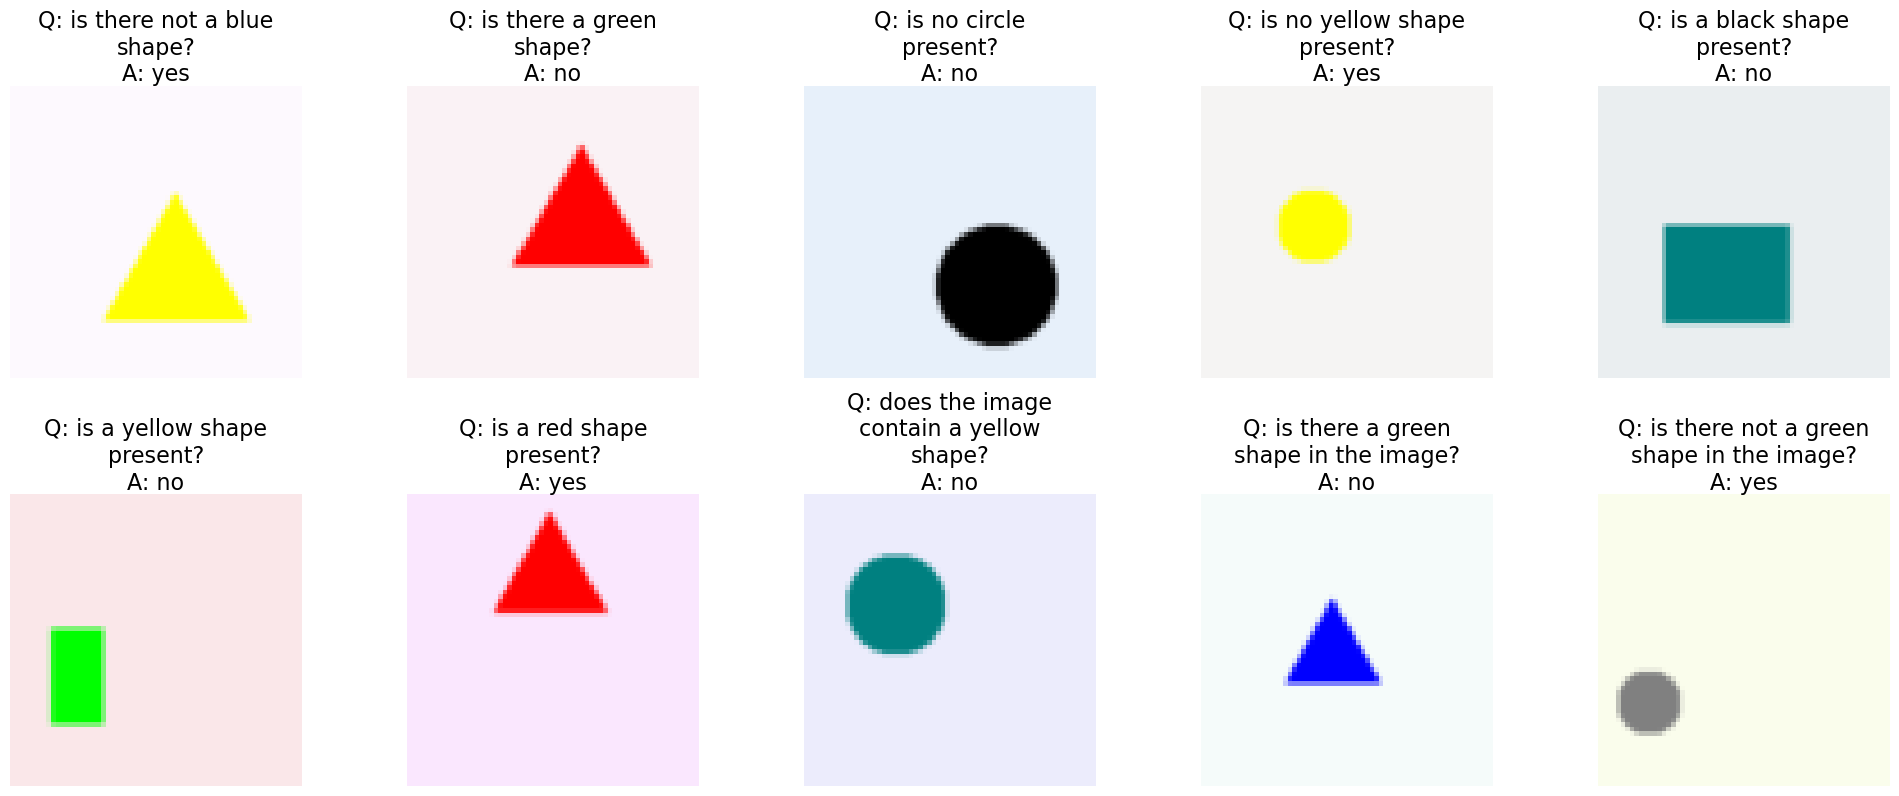

Sample images saved as analysis/easyvqa//0.easyvqa_sample_images.pdf


In [9]:
args = VQAParameters(Suffix.Val, recompute=False)  # using combined dataset
args.processor = processor
dataset = EasyVQAGeneration(args)
display_sample_images(
    dataset.raw_dataset, "EASY-VQA", f"{DIR}/0.easyvqa_sample_images.pdf", 10, 16
)

### 1. Label Frequency Bar Chart


In [10]:
args = VQAParameters(Suffix.Train, recompute=False)  # using combined dataset
args.processor = processor
dataset = EasyVQAGeneration(args)
calculate_label_frequency(
    dataset,
    None,
    None,
    path=f"{DIR}/1.easyvqa_bar_base",
    title="Easy-VQA Label Frequency Bar Chart",
)

INFO:lib.dataset_base:Loaded 48248 items from /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/easy-vqa/generation/train.pkl


### 2. Label Frequency Boxplot

In [11]:
create_label_frequency_boxplot(
    dataset,
    path=f"{DIR}/2.easyvqa_boxplot_base",
    title="Easy-VQA Label Frequency Boxplot",
)

Q1: 813.0
Q2: 826.0
Q3: 2105.0
IQR: 1292.0
Lower Whisker: -1125.0
Upper Whisker: 4043.0
Number of unique labels: 13
Mean frequency: 3711.38
Median frequency: 826.00
Number of outliers: 2
Total number of items: 48248


## Processed Dataset
Below are the label frequency bar charts and boxplots for the processed dataset.

### 3. Label Frequency Bar Chart

In [13]:
args = VQAParameters("train", recompute=True, use_proportional_split=True)
args.processor = processor
dataset_train = EasyVQAGeneration(args)

args = VQAParameters("val", recompute=True, use_proportional_split=True)
args.processor = processor
dataset_val = EasyVQAGeneration(args)

args = VQAParameters("test", recompute=True, use_proportional_split=True)
args.processor = processor
dataset_test = EasyVQAGeneration(args)

calculate_label_frequency(
    dataset_train,
    dataset_val,
    dataset_test,
    path=f"{DIR}/3.easyvqa_bar_processed",
    title="Easy-VQA Processed Dataset Bar Chart",
)

INFO:lib.easy_vqa.easyvqa_base:Read combined dataset, length: 48248
Casting to class labels: 100%|██████████| 13558/13558 [00:00<00:00, 1047899.71 examples/s]
INFO:lib.easy_vqa.easyvqa_base:Read train dataset, length: 10846
INFO:lib.dataset_base:Preparing data for training
Map: 100%|██████████| 10846/10846 [00:00<00:00, 30825.30 examples/s]
INFO:lib.dataset_base:Saving dataset to /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/easy-vqa/generation/train.pkl
INFO:lib.dataset_base:Saved dataset configuration to /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/easy-vqa/generation/train.pkl
INFO:lib.dataset_base:Preparing data for training
Map: 100%|██████████| 2712/2712 [00:00<00:00, 32983.69 examples/s]
INFO:lib.dataset_base:Saving dataset to /home/atomwalk12/Dropbox (Old)/notes/vision/project/BeyondVisionQA/VisualQA/data/easy-vqa/generation/val.pkl
INFO:lib.dataset_base:Saved dataset configuration to /home/atomwalk12/Dropbo

## 4. Label Frequency Boxplot

In [14]:
dataset = concatenate_datasets(
    [dataset_train.raw_dataset, dataset_val.raw_dataset, dataset_test.raw_dataset]
)
create_label_frequency_boxplot(
    dataset,
    path=f"{DIR}/4.easyvqa_boxplot_processed",
    title="Easy-VQA Processed Dataset Boxplot",
)

Q1: 813.0
Q2: 826.0
Q3: 2100.0
IQR: 1287.0
Lower Whisker: -1117.5
Upper Whisker: 4030.5
Number of unique labels: 13
Mean frequency: 1300.38
Median frequency: 826.00
Number of outliers: 0
Total number of items: 16905
